Queries:

Which regions have the highest total sales revenue?

What is the average unit price and unit cost for each item type?

Which country has the highest total profit?

How does the sales channel affect the order priority distribution?


Which item types have the highest and lowest total sales?

How does the order priority vary across different regions?

What is the correlation between unit price and total profit?

Are there any seasonal trends or patterns in the sales data?

How does the number of units sold vary across different countries?
How does the total sales revenue vary across different countries?

What is the distribution of unit prices for each item type?

Which sales channel has the highest average unit price?

Are there any outliers in the total cost distribution?

How does the total profit vary across different item types?

Which region has the highest average total revenue per order?

Is there a relationship between the number of units sold and the total profit?

How does the order priority vary based on the item type?

Are there any trends or patterns in the order dates?
What is the average order processing time for each country?
What is the average order processing time (duration between order and ship dates) for each sales channel?


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales_data = pd.read_csv('/content/Amazon Sales data (1).csv')
sales_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
sales_data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [6]:
sales_data.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [7]:
sales_data.shape

(100, 14)

In [8]:
sales_data.value_counts()

Region                             Country                           Item Type      Sales Channel  Order Priority  Order Date  Order ID   Ship Date   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit
Asia                               Bangladesh                        Clothes        Online         L               1/13/2017   187310731  03-01-2017  8263        109.28      35.84      902980.64      296145.92   606834.72       1
North America                      Mexico                            Personal Care  Offline        M               7/30/2015   559427106  08-08-2015  5767        81.73       56.67      471336.91      326815.89   144521.02       1
Sub-Saharan Africa                 Djibouti                          Cosmetics      Offline        H               04-07-2014  259353148  4/19/2014   7215        437.20      263.33     3154398.00     1899925.95  1254472.05      1
                                                                     Cereal         Online         H               5/20/2017   555990016  6/17/2017   8656        205.70      117.11     1780539.20     1013704.16  766835.04       1
                                   Democratic Republic of the Congo  Beverages      Online         C               5/26/2011   585920464  7/15/2011   5741        47.45       31.79      272410.45      182506.39   89904.06        1
                                                                                                                                                                                                                                   ..
Europe                             Austria                           Cosmetics      Offline        H               2/23/2015   868214595  03-02-2015  2847        437.20      263.33     1244708.40     749700.51   495007.89       1
                                   Albania                           Clothes        Online         C               02-02-2010  385383069  3/18/2010   2269        109.28      35.84      247956.32      81320.96    166635.36       1
Central America and the Caribbean  Nicaragua                         Beverages      Offline        C               02-08-2011  963392674  3/21/2011   8156        47.45       31.79      387002.20      259279.24   127722.96       1
                                   Honduras                          Snacks         Online         L               6/30/2016   795490682  7/26/2016   2225        152.58      97.44      339490.50      216804.00   122686.50       1
Sub-Saharan Africa                 Zambia                            Snacks         Online         L               01-04-2011  122583663  01-05-2011  4085        152.58      97.44      623289.30      398042.40   225246.90       1
Name: count, Length: 100, dtype: int64

**Which regions have the highest total sales revenue?**


In [9]:
region_sales = sales_data.groupby('Region')['Total Revenue'].sum()


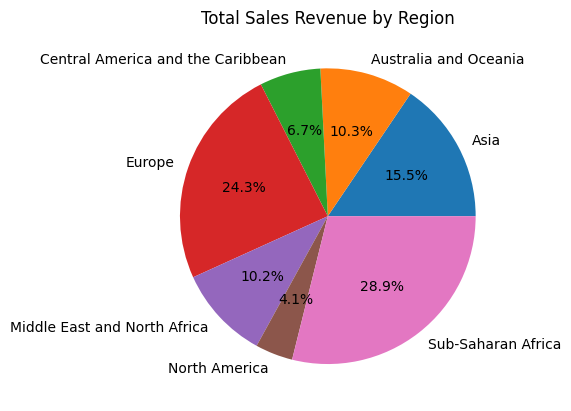

In [10]:
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title('Total Sales Revenue by Region')
plt.show()

**'Sub-Saharan Africa'**

**What is the average unit price and unit cost for each item type?**

In [11]:
average_unit_price = sales_data[['Unit Cost','Unit Price','Item Type']].groupby('Item Type').mean().reset_index()


In [12]:
average_unit_price

,Item Type,Unit Cost,Unit Price
0,Baby Food,159.42,255.28
1,Beverages,31.79,47.45
2,Cereal,117.11,205.70
3,Clothes,35.84,109.28
4,Cosmetics,263.33,437.20
5,Fruits,6.92,9.33
6,Household,502.54,668.27
7,Meat,364.69,421.89
8,Office Supplies,524.96,651.21
9,Personal Care,56.67,81.73


**Which country has the highest total profit?**


In [13]:
country_profit = sales_data.groupby('Country')['Total Profit'].sum()


In [14]:
highest_country_profit = country_profit.idxmax()
print(f"Country with the highest profit: {highest_country_profit}")

Country with the highest profit: Djibouti


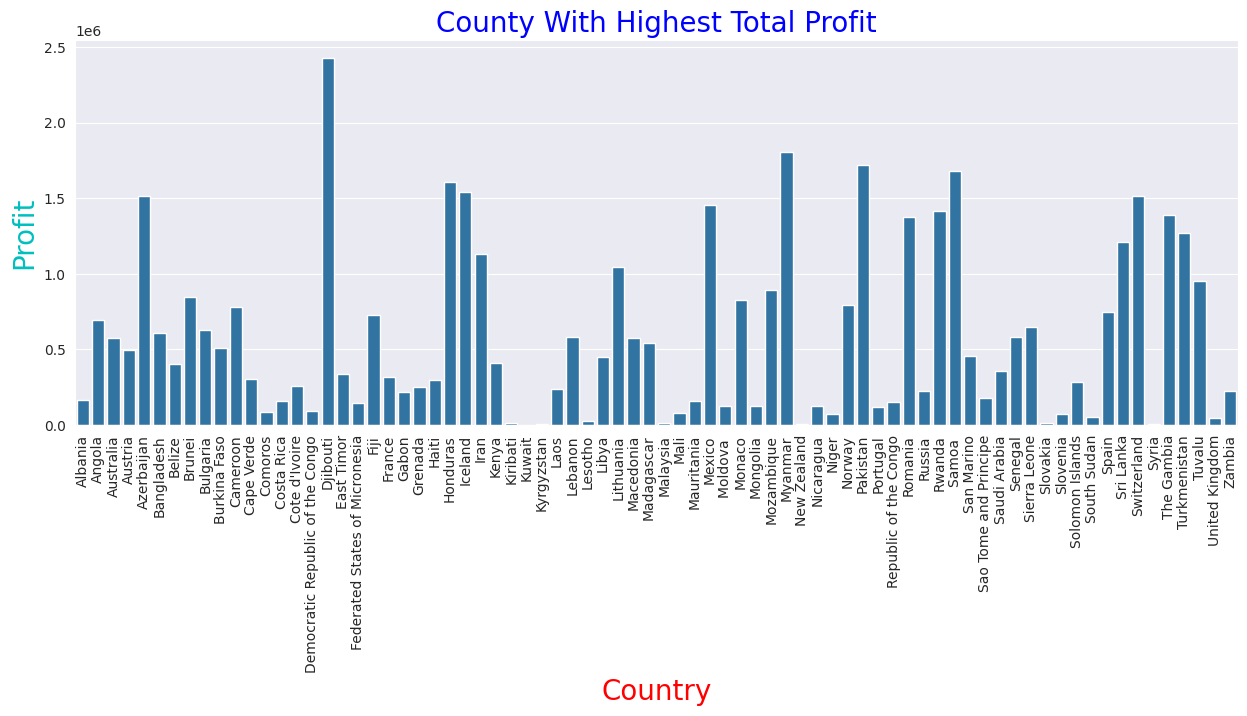

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
# Pass the dataframe to the `data` parameter, and use column names for `x` and `y`
sns.barplot(x=country_profit.index, y=country_profit.values)

plt.xticks(rotation=90)
plt.title('County With Highest Total Profit', fontsize=20, color='Blue')
plt.xlabel('Country', fontsize=20, color='red')
plt.ylabel('Profit', fontsize=20, color='c')
plt.show()

**How does the sales channel affect the order priority distribution?**

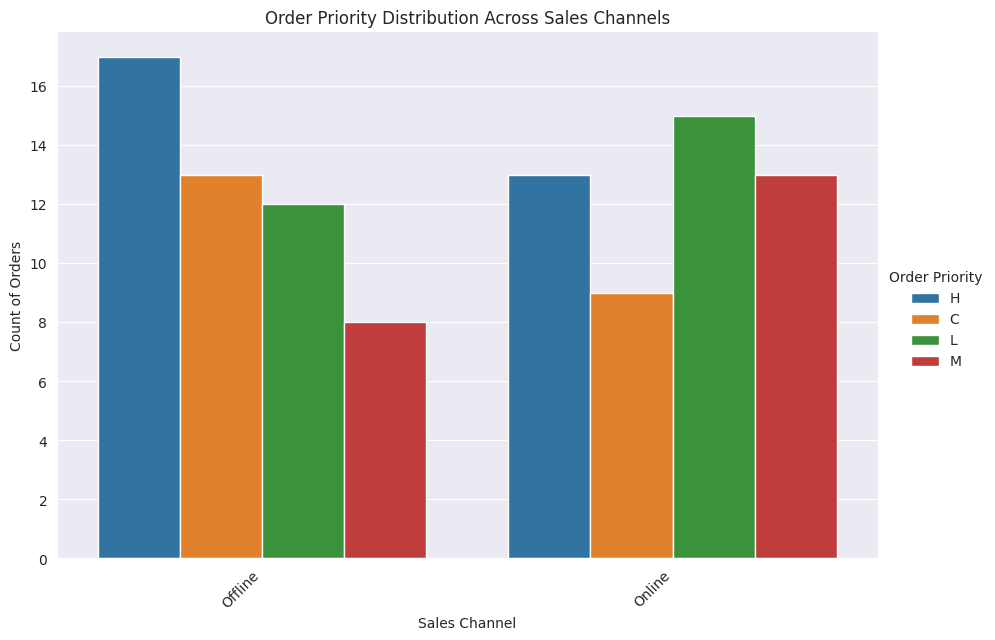

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the catplot
sns.catplot(x="Sales Channel", hue="Order Priority", kind="count", data=sales_data, height=6, aspect=1.5)
plt.title("Order Priority Distribution Across Sales Channels")
plt.xlabel("Sales Channel")
plt.ylabel("Count of Orders")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [17]:
sales_channel_order_priority_distribution = sales_data.groupby('Sales Channel')['Order Priority'].value_counts()
sales_channel_order_priority_distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

**Which item types have the highest and lowest total sales?**

In [18]:
Total_item_type = sales_data.groupby('Item Type')['Total Revenue'].sum()
highest_item_type =Total_item_type.idxmax()
lowest_item_type =Total_item_type.idxmin()
print("{'Highest Sales Revenue By Item Type':", highest_item_type, "\n'Lowest Sales Revenue By Item Type':", lowest_item_type, "}")



{'Highest Sales Revenue By Item Type': Cosmetics 
'Lowest Sales Revenue By Item Type': Fruits }


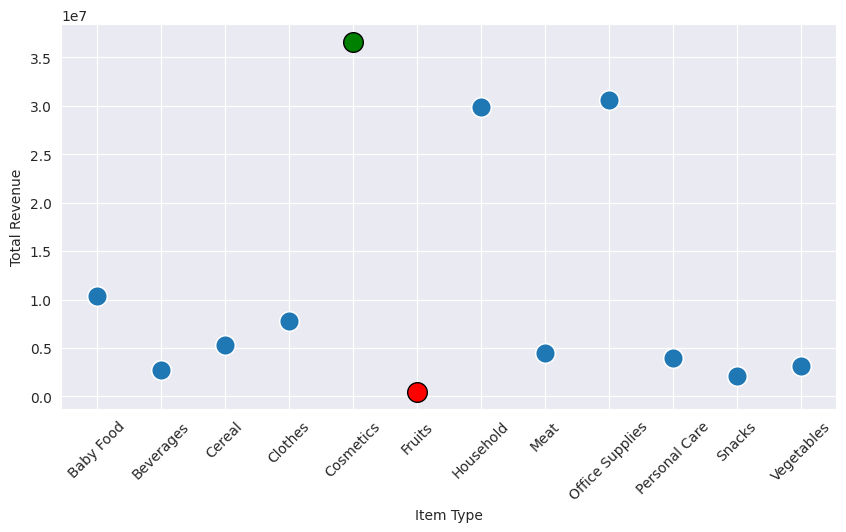

In [19]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=Total_item_type.index, y=Total_item_type, s=200)
max_index = Total_item_type.idxmax()
plt.scatter(x=max_index, y=Total_item_type[max_index], s=200, color='Green', edgecolor='black')

# Highlight the minimum value
min_index = Total_item_type.idxmin()
plt.scatter(x=min_index, y=Total_item_type[min_index], s=200, color='RED', edgecolor='black')

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

**How does the order priority vary across different regions?**

In [20]:
order_priority_regions = sales_data.groupby('Order Priority')['Region'].value_counts()
order_priority_regions

Order Priority  Region                           
C               Sub-Saharan Africa                    8
                Europe                                5
                Australia and Oceania                 4
                Asia                                  2
                Central America and the Caribbean     2
                North America                         1
H               Sub-Saharan Africa                   11
                Europe                                7
                Australia and Oceania                 5
                Asia                                  3
                Central America and the Caribbean     2
                Middle East and North Africa          2
L               Sub-Saharan Africa                    9
                Europe                                6
                Asia                                  4
                Middle East and North Africa          4
                Central America and the Caribbean     2
                Australia and Oceania                 1
                North America                         1
M               Sub-Saharan Africa                    8
                Europe                                4
                Middle East and North Africa          4
                Asia                                  2
                Australia and Oceania                 1
                Central America and the Caribbean     1
                North America                         1
Name: count, dtype: int64

In [21]:
order_priority_regions = sales_data.groupby('Order Priority')['Region'].value_counts().reset_index(name='Order Priority Count')

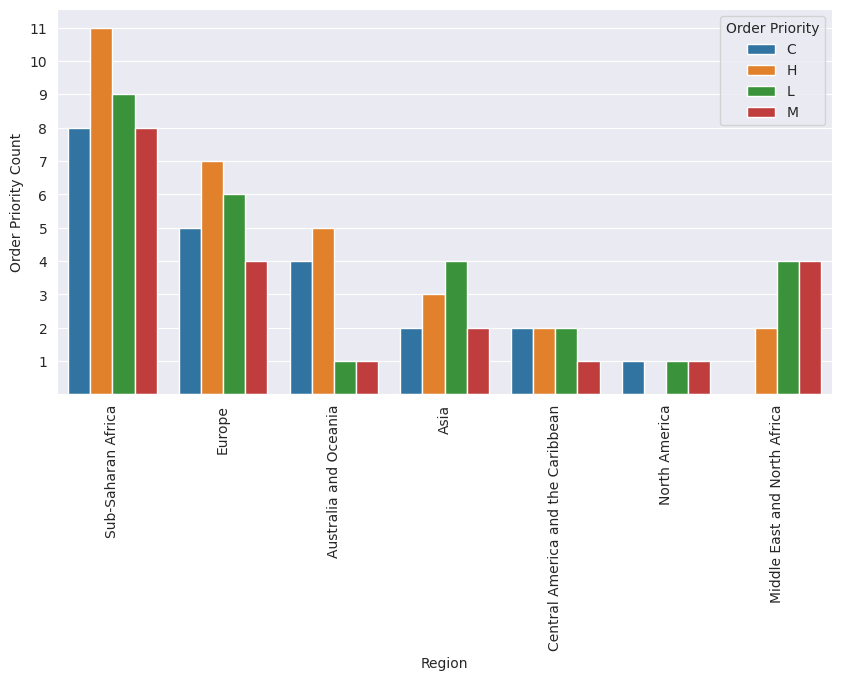

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(order_priority_regions,x='Region', y='Order Priority Count',hue='Order Priority')
plt.xticks(rotation=90)
plt.yticks(np.arange(1,12,1))
plt.show()

**What is the correlation between unit price and total profit?**

In [23]:
Correlation_Unit_Price_Total_Profit= sales_data['Unit Price'].corr(sales_data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)

Correlation between Unit Price and Total Profit: 0.5573652488121267


<function matplotlib.pyplot.show(close=None, block=None)>

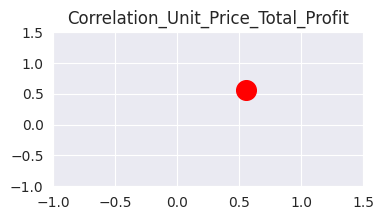

In [24]:
plt.figure(figsize=(4,2))
plt.scatter(x= Correlation_Unit_Price_Total_Profit, y= Correlation_Unit_Price_Total_Profit, s= 200, color= 'RED' )
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.title('Correlation_Unit_Price_Total_Profit')

plt.show

** What is the average order processing time (duration between order and ship dates) for each sales channel?**

In [31]:
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'], format='%m/%d/%Y', errors='coerce')  # Changed the format to '%m/%d/%Y' to match the actual format of 'Ship Date' column and handle potntial errors using errors='coerce'
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%m/%d/%Y', errors='coerce') # Changed the format to '%m/%d/%Y' to match the actual format of 'Order Date' column and handle potntial errors using errors='coerce'
sales_data['Processing Time'] = sales_data['Ship Date'] - sales_data['Order Date']

Avg_Processing_Time= sales_data.groupby(sales_data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

,Processing Time
Sales Channel,
Offline,26 days 17:08:34.285714285
Online,24 days 04:21:49.090909091


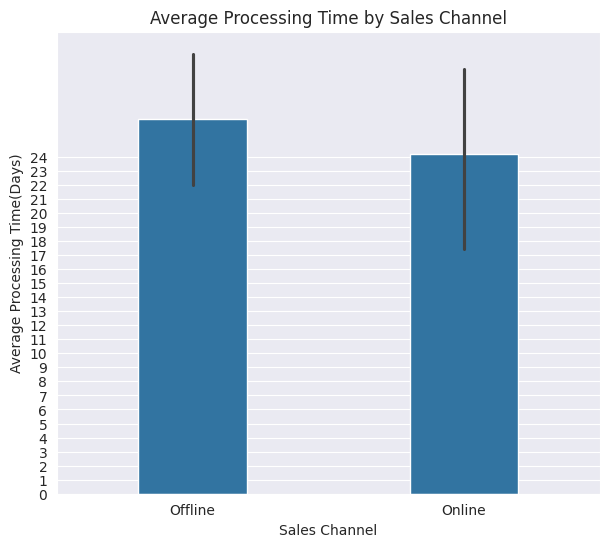

In [32]:
plt.figure(figsize=(7, 6))

sns.barplot(data= sales_data, x= sales_data['Sales Channel'], y=sales_data['Processing Time'].dt.days, width= 0.4 )

plt.title('Average Processing Time by Sales Channel')
plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()

**What is the average order processing time for each country?**

In [33]:
Avg_Processing_Time_by_country= sales_data.groupby(sales_data['Country'])['Processing Time'].mean()
Avg_Processing_Time_by_country

,Processing Time
Country,
Albania,NaT
Angola,4 days
Australia,29 days
Austria,NaT
Azerbaijan,41 days
...,...
The Gambia,9 days
Turkmenistan,24 days
Tuvalu,30 days


**Are there any seasonal trends or patterns in the sales data?**

In [34]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = sales_data.groupby(sales_data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales

,Total Revenue
Order Date,
JAN,8846293.82
FEB,5884465.12
MAR,2028407.92
APR,8406818.15
MAY,11064739.47
JUN,4045279.41
JUL,10191773.17
AUG,672685.87
SEPT,5294357.85


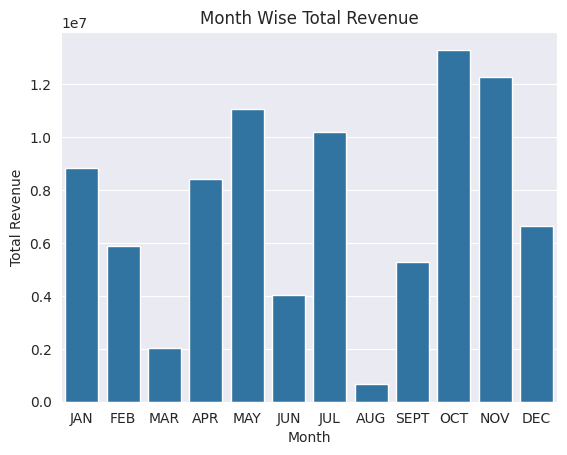

In [35]:
sns.barplot(x= monthly_sales.index, y= monthly_sales)
plt.title('Month Wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**How does the number of units sold vary across different countries?**

In [36]:
Diff_countries_by_unit_sold= sales_data.groupby(sales_data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)
Diff_countries_by_unit_sold

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


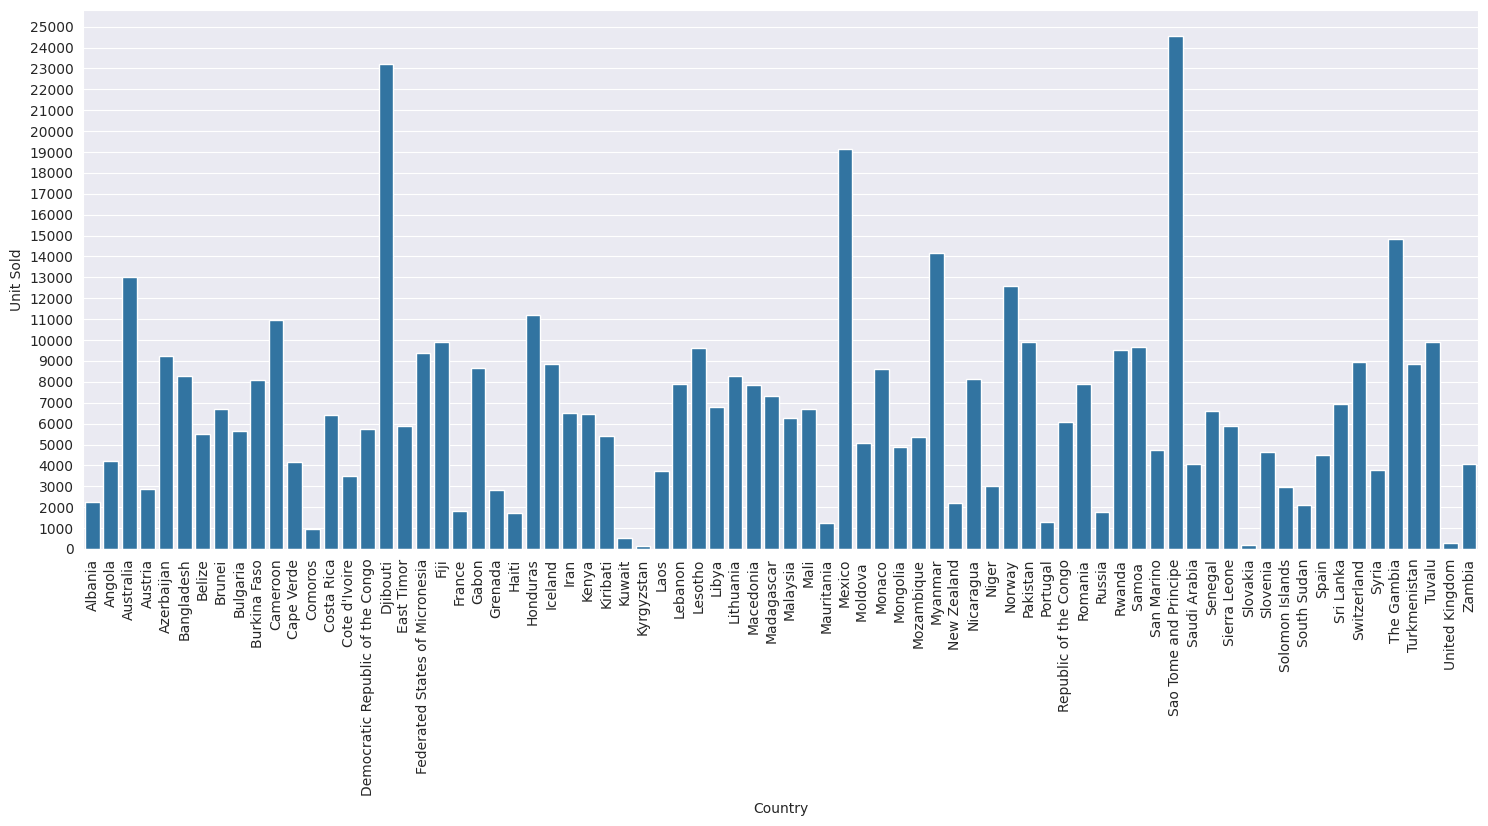

In [37]:
plt.figure(figsize= (18,7))
sns.barplot( data= Diff_countries_by_unit_sold, x= 'Country', y= 'Unit Sold')
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.show()

**How does the total sales revenue vary across different countries?**

In [38]:
sales_revenue_by_country = sales_data.groupby(sales_data['Country'])['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_country


,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


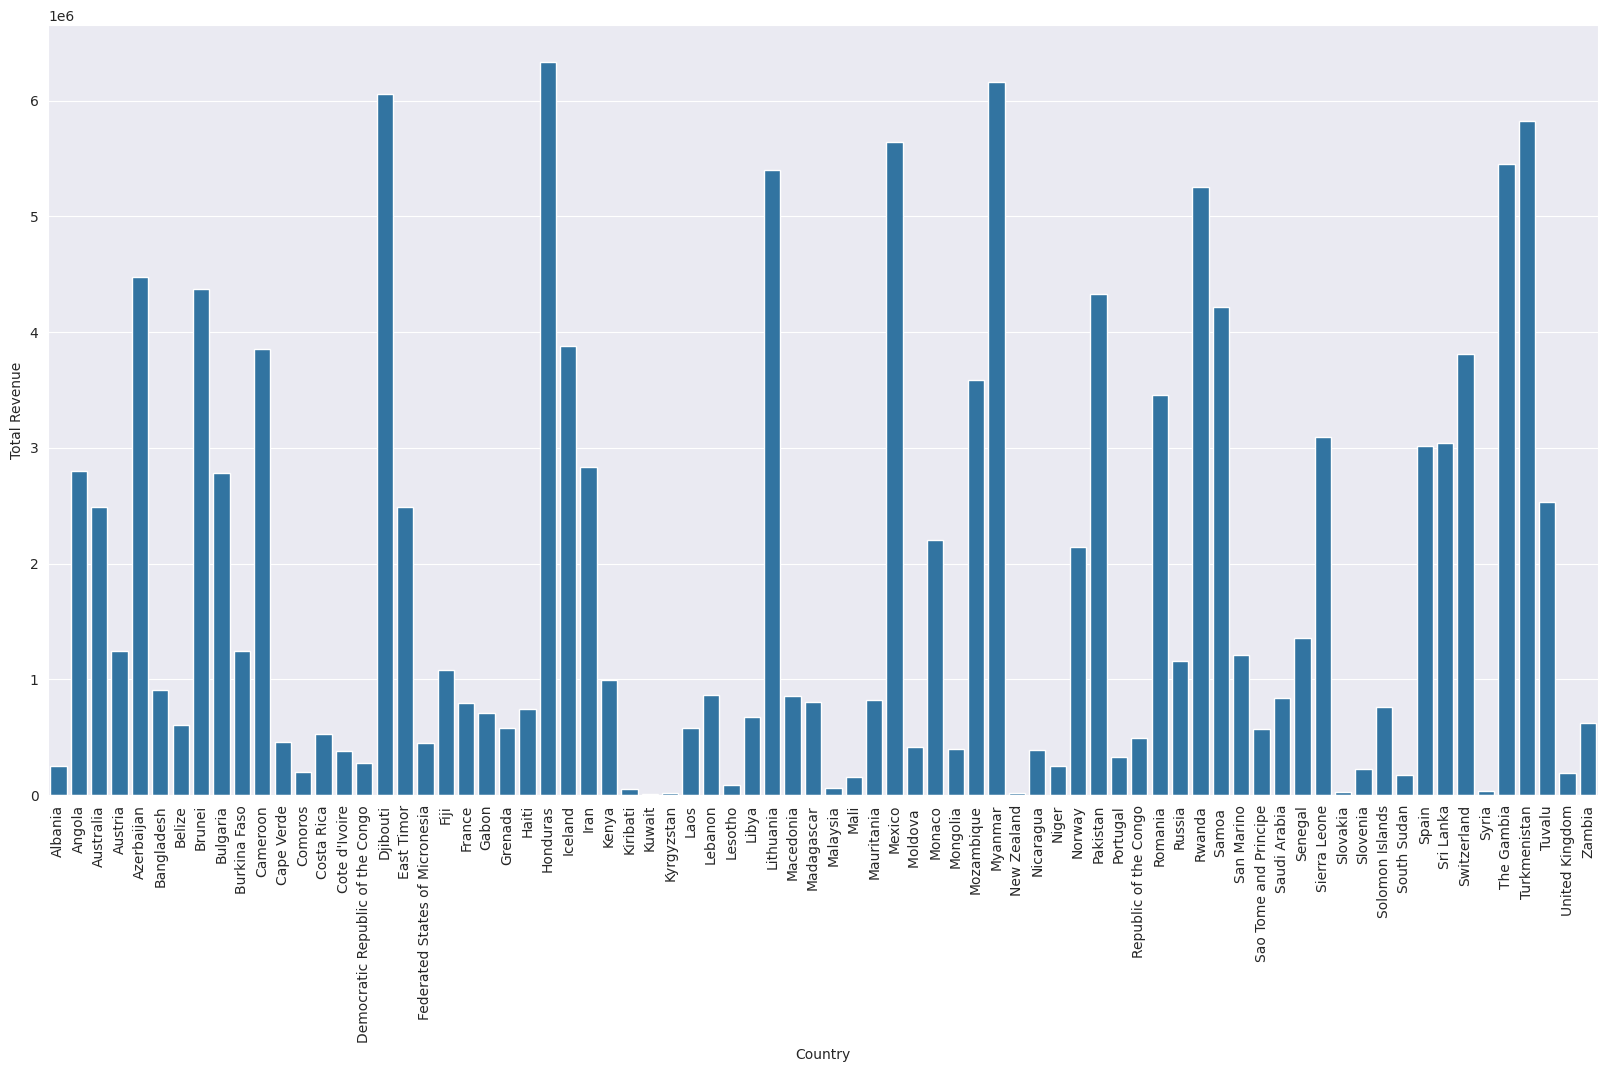

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x= sales_revenue_by_country['Country'], y= sales_revenue_by_country['Total Revenue'])
plt.xticks(rotation= 90)
plt.show()

**What is the distribution of unit prices for each item type?**

In [40]:
sales_data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Processing Time'],
      dtype='object')

In [41]:
#unit_price_by_item_type = sales_data.groupby(sales_data['Unit Price'])['Item Type'].sum()
#unit_price_by_item_type
unit_price_by_item_type = sales_data.groupby('Unit Price')['Item Type'].value_counts()
unit_price_by_item_type

,,count
Unit Price,Item Type,
9.33,Fruits,10
47.45,Beverages,8
81.73,Personal Care,10
109.28,Clothes,13
152.58,Snacks,3
154.06,Vegetables,6
205.70,Cereal,7
255.28,Baby Food,7
421.89,Meat,2


In [42]:
unit_price_and_item_type_distribution= sales_data.groupby(sales_data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


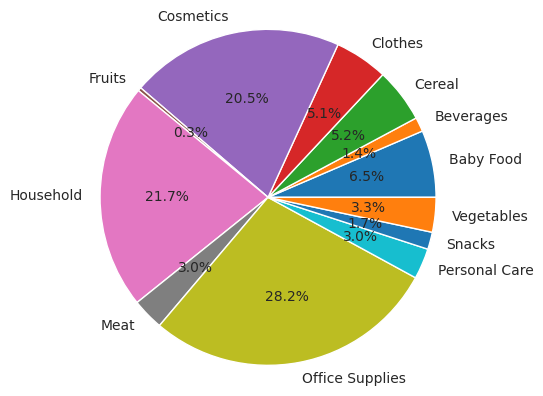

In [43]:
plt.pie(x= unit_price_and_item_type_distribution['Unit Price'], labels= unit_price_and_item_type_distribution['Item Type'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

**Which sales channel has the highest average unit price?**

In [44]:
sales_Channel_unit_price = sales_data.groupby('Sales Channel')['Unit Price'].sum()

In [45]:
Highest_avg_unit_price_for_sales_channel= sales_data.groupby(sales_data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel


,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


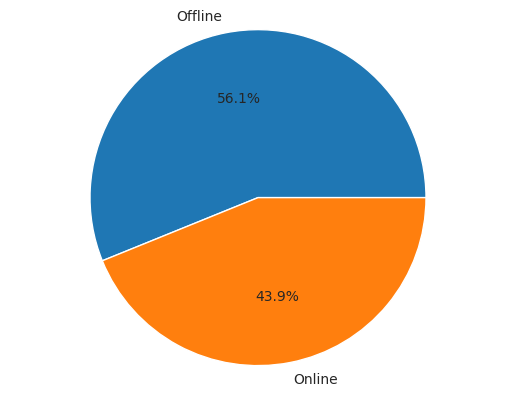

In [46]:
plt.pie(x= Highest_avg_unit_price_for_sales_channel['new'],labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'], autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

**Are there any outliers in the total cost distribution?**

In [47]:
Q1 = sales_data['Total Cost'].quantile(0.25)
Q3 = sales_data['Total Cost'].quantile(0.75)
IQR = Q3 - Q1

In [48]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [49]:
outliers = sales_data[(sales_data['Total Cost'] > upper_bound) | (sales_data['Total Cost'] < lower_bound)]

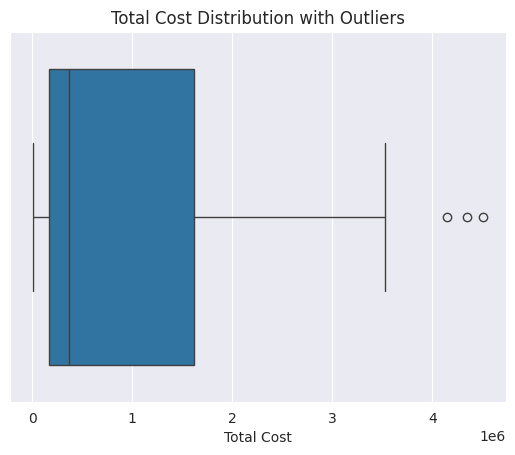

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=sales_data['Total Cost'])
plt.title('Total Cost Distribution with Outliers')
plt.show()

**How does the total profit vary across different item types?**

In [51]:
total_profit_by_item_type = sales_data.groupby(sales_data['Item Type'])['Total Profit'].sum().reset_index(name= 'Total Profit')
total_profit_by_item_type

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48


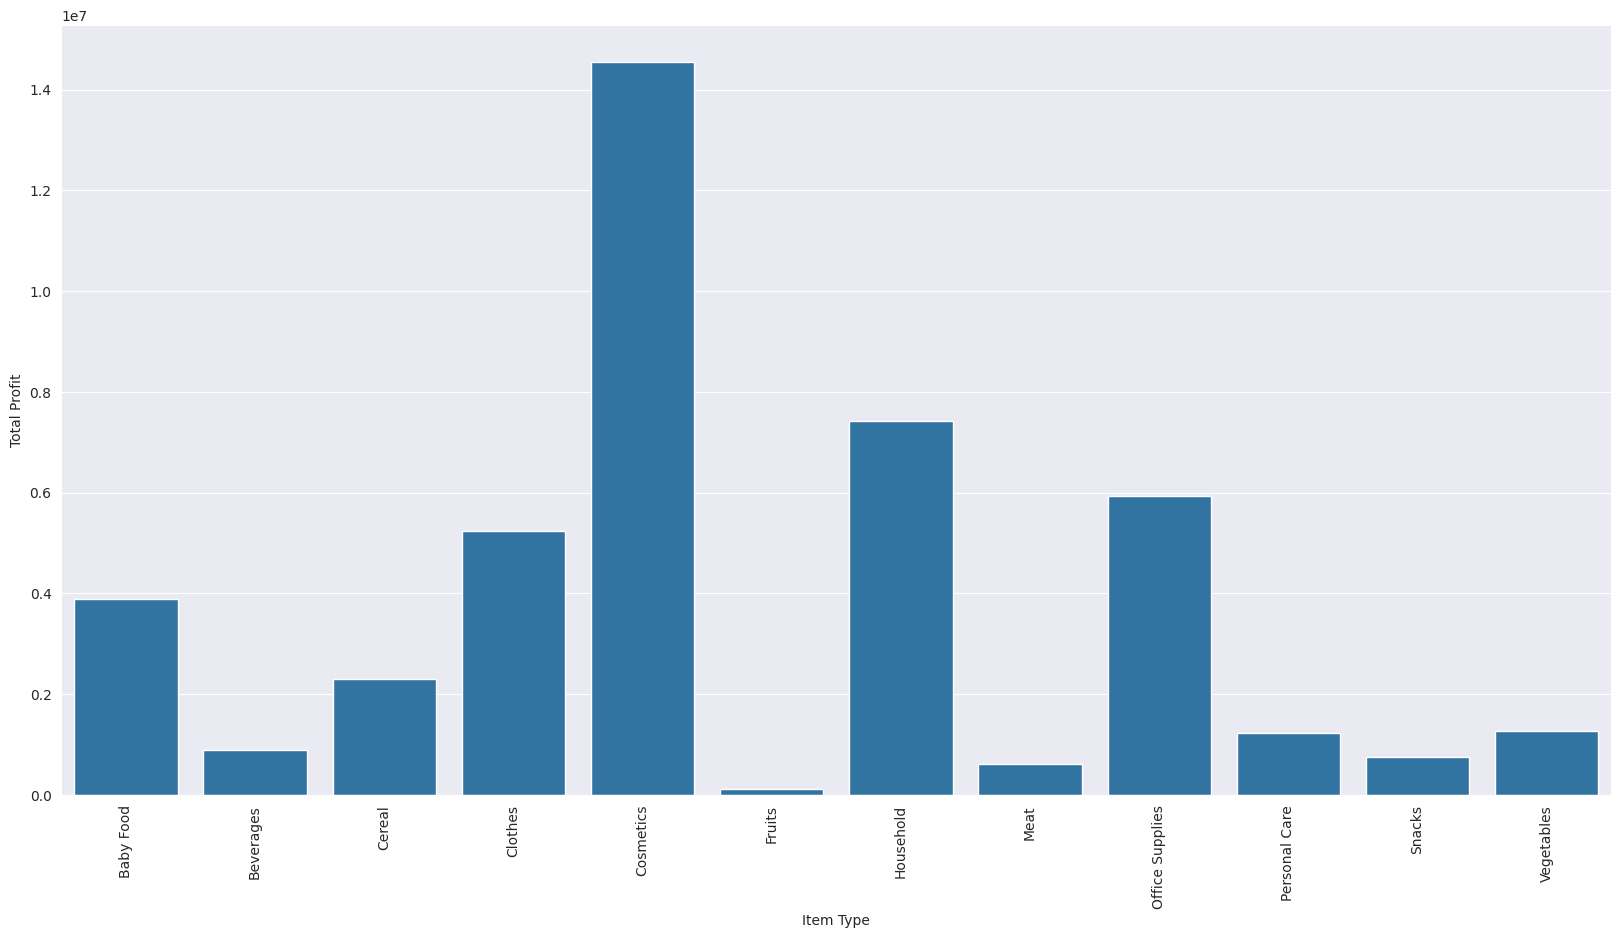

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x= total_profit_by_item_type['Item Type'], y= total_profit_by_item_type['Total Profit'])
plt.xticks(rotation= 90)
plt.show()

**Which region has the highest average total revenue per order?**

In [53]:
sales_data['avg total revenue']= sales_data['Total Revenue']/sales_data['Units Sold']
highest_avg_total_revenue_per_order= sales_data.groupby(sales_data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)

,avg total revenue
Region,
Asia,335.809091


**Is there a relationship between the number of units sold and the total profit?**

In [54]:
Correlation_unit_sold_and_total_profit= sales_data['Units Sold'].corr(sales_data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")


Correlation coefficient: 0.5645504620845976


**How does the order priority vary based on the item type?**

In [55]:
Order_priority_vary_on_item_type= sales_data.groupby(sales_data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type

,Order Priority,Item Type,No. Of Items
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1


**Are there any trends or patterns in the order dates?**

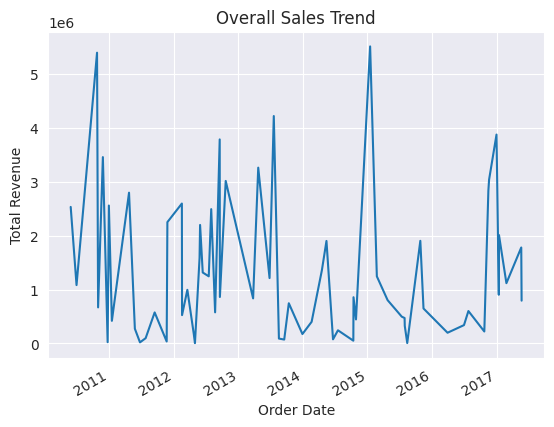

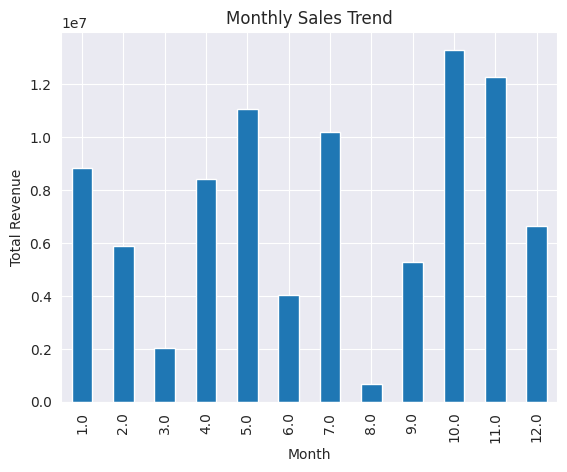

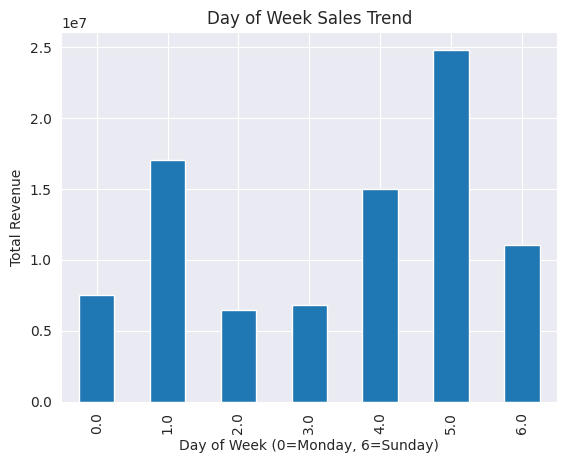

In [56]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['DayOfWeek'] = sales_data['Order Date'].dt.dayofweek
sales_data.groupby('Order Date')['Total Revenue'].sum().plot()
plt.title('Overall Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.show()
sales_data.groupby('Month')['Total Revenue'].sum().plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()
sales_data.groupby('DayOfWeek')['Total Revenue'].sum().plot(kind='bar')
plt.title('Day of Week Sales Trend')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Revenue')
plt.show()